<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/2layers_2node_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

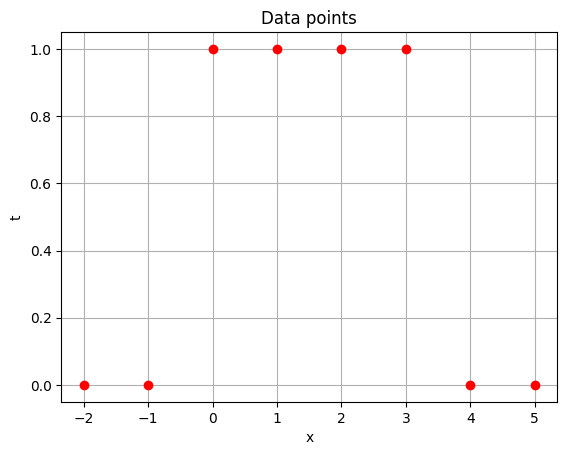

Epoch    0: Cost=2.004719
Epoch 50000: Cost=0.063145
Epoch 100000: Cost=0.022610
Epoch 150000: Cost=0.013234

최종 결과:
W1,W2 = [[6.96559412 4.83924948]] [[ 1.04179225]
 [-1.06933881]]
B1,B2 = [[  3.19494352 -16.9169642 ]] [[-0.01140083]]


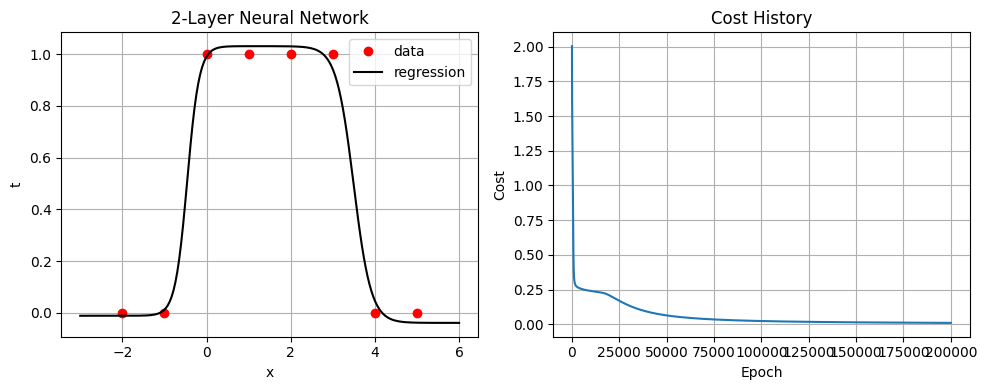

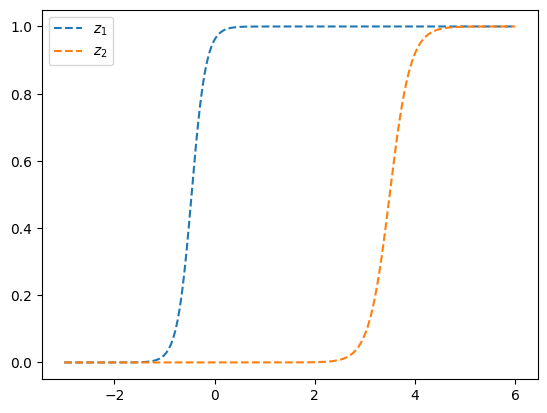

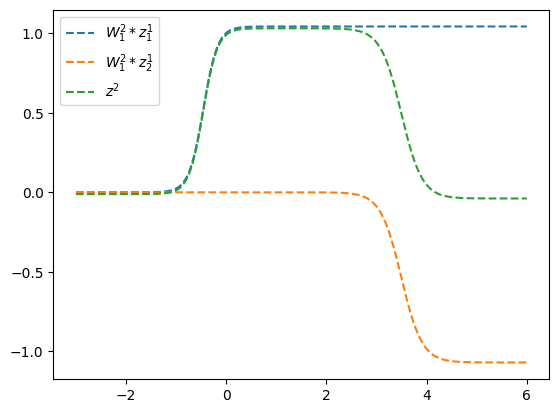

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 15 02:09:00 2025

@author: kcshi
"""

import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터
x = np.array([-2, -1, 0,  1, 2, 3, 4,5])
t = np.array([ 0,  0, 1,  1, 1, 1, 0,0])
N = len(x)
x = x.reshape(N,1)
t = t.reshape(N,1)

plt.plot(x, t, 'ro')
plt.xlabel('x')
plt.ylabel('t')
plt.title("Data points")
plt.grid(True)
plt.show()

# 2. 활성화 함수 및 도함수
phi  = lambda u: 1 / (1 + np.exp(-u))
dphi = lambda u: phi(u) * (1 - phi(u))

# 3. 파라미터 초기화
np.random.seed(0)
W1 = np.random.randn(1, 2) * 0.5  # 은닉층: 2개 노드, 각 (bias, weight)
B1 = np.random.randn(1, 2) * 0.5     # 출력층: (bias, w1, w2)

W2 = np.random.randn(2, 1) * 0.5
B2 = np.random.randn(1,1)    * 0.5     # 출력층: (bias, w1, w2)

# 4. 비용 함수
def compute_cost(x, t, W1,B1,W2,B2):
    A1 = x*W1 + B1
    Z1 = phi(A1)
    A2 = np.matmul(Z1,W2) + B2
    e = A2 - t
    l = e**2
    cost = l.sum()
    return cost

# 5. 학습 설정
learning_rate = 0.01
epochs = 200000
cost_history = []

# 6. 학습 루프
for epoch in range(epochs):
    # forward
    A1 = x*W1 + B1
    Z1 = phi(A1)
    A2 = np.matmul(Z1,W2) + B2
    e = A2 - t
    l = e**2

    #backward
    dl_de = 2*e
    dl_dA2 = dl_de*1

    dl_dW2 = np.matmul(Z1.T,dl_dA2)
    dl_dB2 = np.sum(dl_dA2)

    W2 -=learning_rate*dl_dW2
    B2 -=learning_rate*dl_dB2

    dl_dZ1 = dl_dA2*W2.T
    dl_dA1 = Z1*(1-Z1)*dl_dZ1
    dl_dW1 = np.matmul(x.T,dl_dA1)
    dl_dB1 = dl_dA1.sum(axis=0)

    W1 -=learning_rate*dl_dW1
    B1 -=learning_rate*dl_dB1

    # 비용 기록
    cost = compute_cost(x, t, W1,B1,W2,B2)
    cost_history.append(cost)

    if epoch % 50000 == 0:
        print(f"Epoch {epoch:4d}: Cost={cost:.6f}")

# 7. 결과 출력
print("\n최종 결과:")
print("W1,W2 =", W1,W2)
print("B1,B2 =", B1,B2)

# 8. 결과 시각화
xx = np.linspace(-3,6, 200).reshape(-1,1)
A1 = xx*W1 + B1
Z1 = phi(A1)
Z2= np.matmul(Z1,W2) + B2

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, t, 'ro', label='data')
plt.plot(xx, Z2, 'k', label='regression')
plt.xlabel('x')
plt.ylabel('t')
plt.title('2-Layer Neural Network')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)

plt.tight_layout()
plt.show()

z1 = phi(xx*W1[:,0] + B1[0,0])
z2 = phi(xx*W1[:,1] + B1[0,1])

plt.figure()
plt.plot(xx,z1,'--',label = r'$z_1$')
plt.plot(xx,z2,'--',label = r'$z_2$')
plt.legend()
plt.show()

plt.figure()
plt.plot(xx,W2[0,0]*z1,'--',label = r'$W^2_{1}*z^1_1$')
plt.plot(xx,W2[1,0]*z2,'--',label = r'$W^2_{1}*z^1_2$')
plt.plot(xx,Z2,'--',label = r'$z^2$')
plt.legend()
plt.show()


# # 9. 분류 함수
# def classifier(x):
#     z1 = phi(W[0,0] + W[0,1]*x)
#     z2 = phi(W[1,0] + W[1,1]*x)
#     y  = phi(V[0] + V[1]*z1 + V[2]*z2)
#     return (y > 0.5).astype(np.int16)

# # 10. 테스트
# xx_test = np.array([-3, -1, 0, 1, 2, 3])
# print("\n테스트 데이터:", xx_test)
# print("예측 클래스   :", classifier(xx_test))
